In [61]:
# --- INSTALLATION ---

!pip install pandas matplotlib seaborn
!kaggle datasets download -d shanegerami/ai-vs-human-text
!unzip -n ai-vs-human-text.zip
!rm ai-vs-human-text.zip

# -------------------------

Dataset URL: https://www.kaggle.com/datasets/shanegerami/ai-vs-human-text
License(s): other
 99% 345M/350M [00:07<00:00, 56.3MB/s]
100% 350M/350M [00:07<00:00, 51.1MB/s]
Archive:  ai-vs-human-text.zip


In [62]:
# --- IMPORTS ---

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------

In [63]:
# --- READING DATASET ---

df = pd.read_csv('AI_Human.csv')

# -----------------------

First let's check out the size and value counts of the original dataset.

The dataframe has 487235 rows and 2 columns.
The columns names are: ['text', 'generated']
                                                text  generated
0  Cars. Cars have been around since they became ...        0.0
1  Transportation is a large necessity in most co...        0.0
2  "America's love affair with it's vehicles seem...        0.0
3  How often do you ride in a car? Do you drive a...        0.0
4  Cars are a wonderful thing. They are perhaps o...        0.0


generated
0.0    305797
1.0    181438
Name: count, dtype: int64


There are 1.69 times more human written essays than AI-generated ones.



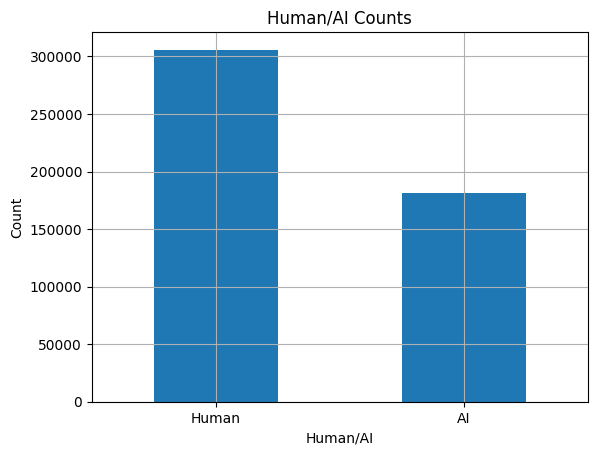

In [64]:
# --- DATASET INFO ---

print(f"The dataframe has {df.shape[0]} rows and {df.shape[1]} columns.")
print(f"The columns names are: {[column for column in df.columns]}")
print(df.head())
print('\n')
print(df['generated'].value_counts())
print('\n')
print(f"There are {(df['generated'].value_counts()[0] / df['generated'].value_counts()[1]):.2f} times more human written essays than AI-generated ones.\n")

# Plot
labels = ['Human', 'AI']
df['generated'].value_counts().plot(kind='bar', grid=True, title="Human/AI Counts", xlabel="Human/AI", ylabel="Count")
plt.xticks(range(len(labels)), labels, rotation=0)
plt.show()

# ---------------------

Now let's check out how are these texts we have in the dataset.

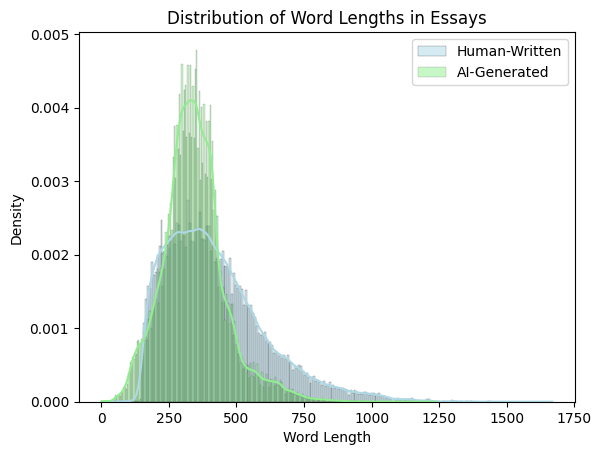

In [65]:
# --- TEXT DATA ---

# Calculate the word lengths for each essay
df['word_length'] = df['text'].apply(lambda x: len(x.split()))

# Separate the data into human-written and AI-generated essays
human_lengths = df[df['generated'] == 0]['word_length']
ai_lengths = df[df['generated'] == 1]['word_length']

# Plot the distribution for human-written essays
sns.histplot(human_lengths, kde=True, color='lightblue', label='Human-Written', stat='density')

# Plot the distribution for AI-generated essays
sns.histplot(ai_lengths, kde=True, color='lightgreen', label='AI-Generated', stat='density')

# Adding titles and labels
plt.title('Distribution of Word Lengths in Essays')
plt.xlabel('Word Length')
plt.ylabel('Density')
plt.legend()
plt.show()

# -----------------

As we can see from the plot, both of the seem to have an average word length of about 350-400 words. What we can also see is that human written ones are more disperse in terms of word length and tend to be longer while the vast majority of AI-generated texts tend to pile in the 350-400 range we talked about before.

Now let's address the unbalance issue and solve it by undersampling the bigger set.

generated
0.0    181438
1.0    181438
Name: count, dtype: int64


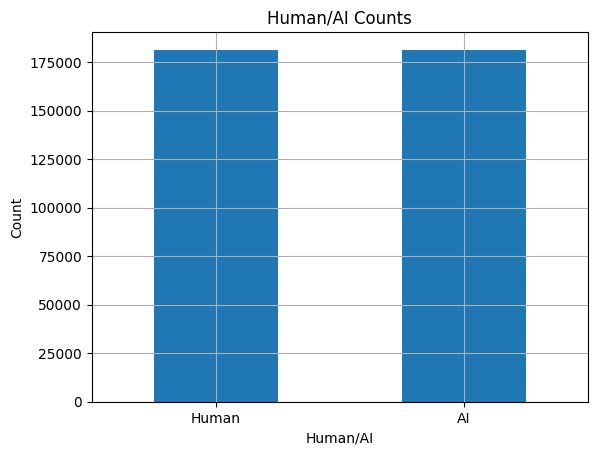

In [66]:
# --- ADDRESSING UNBALANCE ---

# Separate human from ai
df_human = df[df["generated"] == 0]
df_ai = df[df["generated"] == 1]

# Undersample human
df_ai_len = df_ai["text"].count()
df_human_sample = df_human.sample(n=df_ai_len)

# We combine the two dataframes
df_unshuffled = pd.concat([df_human_sample, df_ai])
print(df_unshuffled["generated"].value_counts())

# Plot
labels = ['Human', 'AI']
df_unshuffled['generated'].value_counts().plot(kind='bar', grid=True, title="Human/AI Counts", xlabel="Human/AI", ylabel="Count")
plt.xticks(range(len(labels)), labels, rotation=0)
plt.show()

# ----------------------------

Since this dataset is too large to fine-tune the model with my current resources, I'll undersample this dataset randomly.

generated
1.0    1854
0.0    1775
Name: count, dtype: int64


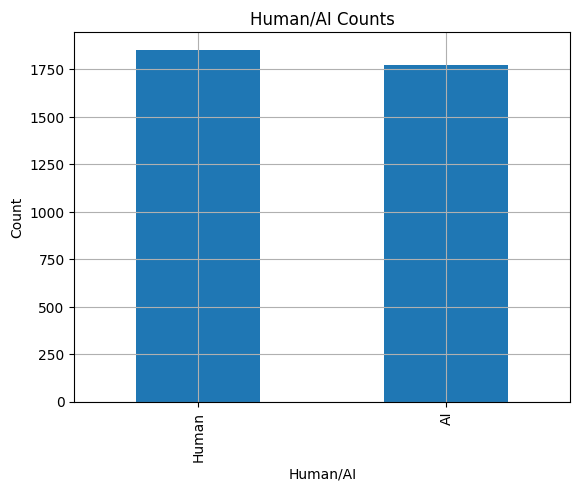

In [67]:
# --- UNDERSAMPLING ---

df_shuffled = df_unshuffled.sample(frac=0.01).reset_index(drop=True)
print(df_shuffled["generated"].value_counts())
df_shuffled["generated"].value_counts().plot(kind='bar', grid=True, title="Human/AI Counts", xlabel="Human/AI", ylabel="Count")
plt.xticks(range(len(labels)), labels)
plt.show()

# ---------------------

As we can see we have succesfully undersample the dataset and balance it for the training. Next would be the tokenization and the training. Check out the [training](https://github.com/diegovelilla/EssAI/blob/main/essai_training.ipynb) and [testing](https://github.com/diegovelilla/EssAI/blob/main/essai_testing.ipynb) notebooks if interested in this.